In [2]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [3]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/기획경영_전처리/서비스기획.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,솔루션 및 프로젝트 기획 콘셉트와 내외부의 문제 요구 사항 필요한 기능 등 정의...,해당 직무에서 2 년 이상 경험을 보유하시고 스토리보드 작성이 가능하신 분 수단...
1,디지털광고 상품DSP 등 전략 수립 및 기획 고객행동 데이터 분석 및 분석서비스 ...,데이터 기반 솔루션 전략 수립 및 기획 5년 이상 경력이 있는 분 서비스 기획 또...
2,성장 포인트에 대해 알려드려요하나 기획자로서 거래소라는 복잡한 Application...,3년 이상의 경력자 0to1을 해보셨거나 하고자 하는 강한 의지가 있으신 분 가설...
3,서비스 기획모바일 서비스 인투펫 앱 서비스 기획IA 서비스 정책 수립 요구사항 정의...,학력 대졸이상경력 310년IT 서비스 기획 3년 이상사용자 관점에서 문제를 발견...
4,VitalCare 서비스 기획 웹 UIUX설계 시스템 구축에 대한 요구사항 분석 ...,웹 서비스 기획 및 운영 5년 이상 경력 유저 스토리 기반의 요구사항을 기반으로 ...
...,...,...
218,프로젝트 매니징 업무 자사 서비스웹모바일 신규 기획 및 개선 데이터 분석 경쟁사 ...,웹모바일 기획 경력 5년 이상 PM 경력 보유자 B2C 플랫폼 경험 포트폴리오 제...
219,더즌의 금융 솔루션 이용자B2B를 대상으로 한 admin 및 back office...,Back office 화면 기획 Admin기획 경력 보유 이용자에게 최적화된 UI...
220,글로벌 치과업체 및 랩과의 커뮤니케이션 진행비즈니스 마케팅 기술 협업 관련 논의 ...,영어 능통자 사업 및 파트너십 업무 경력 1년 이상 해외출장에 결격사유가 없는 자...
221,직무개요신규 3세대 블록체인 기반의 분산 애플리케이션dApp 서비스 기획과 전략을...,유관 경력 5년 이상 학력 무관해외 커뮤니티 활동 지원을 위한 영어회화


In [4]:
#사용할 column 선택
df = df[['자격요건 및 우대사항']]
df

,자격요건 및 우대사항
0,해당 직무에서 2 년 이상 경험을 보유하시고 스토리보드 작성이 가능하신 분 수단...
1,데이터 기반 솔루션 전략 수립 및 기획 5년 이상 경력이 있는 분 서비스 기획 또...
2,3년 이상의 경력자 0to1을 해보셨거나 하고자 하는 강한 의지가 있으신 분 가설...
3,학력 대졸이상경력 310년IT 서비스 기획 3년 이상사용자 관점에서 문제를 발견...
4,웹 서비스 기획 및 운영 5년 이상 경력 유저 스토리 기반의 요구사항을 기반으로 ...
...,...
218,웹모바일 기획 경력 5년 이상 PM 경력 보유자 B2C 플랫폼 경험 포트폴리오 제...
219,Back office 화면 기획 Admin기획 경력 보유 이용자에게 최적화된 UI...
220,영어 능통자 사업 및 파트너십 업무 경력 1년 이상 해외출장에 결격사유가 없는 자...
221,유관 경력 5년 이상 학력 무관해외 커뮤니티 활동 지원을 위한 영어회화


In [5]:
#txt로 저장
i = 'C:/Users/User/Desktop/기획경영_전처리/서비스기획(자격요건 및 우대사항).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [6]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'자격요건 및 우대사항\n 해당 직무에서 2 년 이상 경험을 보유하시고 스토리보드 작성이 가능하신 분  수단을 불문하고 협업자에게 정확한 의사와 의도 전달이 가능하신 분  직군을 불문하고 누구와도 적극적이고 원활한 소통이 가능하신 분  클라우드의 A to Z를 알고 싶고 기획자로서 서비스의 A to Z를 경험하고 싶으신 분  포트폴리오 제출 필수 다양한 B2B 프로젝트 케이스를 경험해 보신 분  애자일 방법론으로 Jira 또는 협업 Tool 사용을 해 보신 분  Web 특히 Back Office 기획 경험이 있으신 분  도메인을 불문하고 기술 기반의 Web Service 정책 수립 및 프로세스를 설계해 보신 분  DevOps에 대한 관심이 있으신 분  개발 경험이 있으신 분\n 데이터 기반 솔루션 전략 수립 및 기획 5년 이상 경력이 있는 분 서비스 기획 또는 POPM 경력 5년 이상 혹은 이에 준하는 실력을 갖춘 분 원활한 커뮤니케이션 능력을 보유한 분 담당 업무를 명시한 포트폴리오를 제출한 분 산업공학 통계학 데이터 관련 학위 또는 이에 준하는 지식을 보유한 분 DataDriven 사고를 바탕으로 문제를 파악하고 해결하는 역량을 갖춘 분 RTB 광고 도메인AD Network에 대한 이해 또는 경험이 있는 분 마케팅 지표에 대한 이해도가 있는 분 AWS GAGTM 컨설팅 및 운영 경험이 있는 분\n 3년 이상의 경력자 0to1을 해보셨거나 하고자 하는 강한 의지가 있으신 분 가설검증 사이클을 린하게 돌려본 경험이 있으신 분 프로덕트 단계마다 데이터를 이해해가며 방향성을 유기적으로 제안할 수 있는 분 UX에 대해 높은 가치를 두고 있는 분 주도성 오너십을 가지고 업무를 이끌어 나가실 수 있는 분 새로운 걸 배우는데 두려움이 없고 폭발적으로 성장할 준비가 된 분 다른 팀원과 적극적으로 대화할 수 있는 의사소통 능력이 있으신 분 Web3와 DeFi의 철학에 공감하시거나 관심있으신 분 금융수학에 대한 관심이나 지식이 있는 분 주식크립토 트레이딩 경험이 있으신 분 글

In [7]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['자격',
 '요건',
 '및',
 '우대',
 '사항',
 '해당',
 '직무',
 '년',
 '이상',
 '경험',
 '보유',
 '스토리보드',
 '작성',
 '분',
 '수단',
 '불문',
 '협업',
 '의사',
 '의도',
 '전달',
 '분',
 '직',
 '불문',
 '누구',
 '적극',
 '소통',
 '분',
 '클라우드',
 '를',
 '알',
 '기획',
 '로서',
 '서비스',
 '를',
 '경험',
 '분',
 '포트폴리오',
 '제출',
 '필수',
 '프로젝트',
 '케이스',
 '경험',
 '보신',
 '분',
 '애자',
 '일',
 '방법론',
 '협업',
 '사용',
 '해',
 '보신',
 '분',
 '기획',
 '경험',
 '분',
 '도메인',
 '불문',
 '기술',
 '기반',
 '정책',
 '수립',
 '및',
 '프로세스',
 '설계',
 '보신',
 '분',
 '대한',
 '관심',
 '분',
 '개발',
 '경험',
 '분',
 '데이터',
 '기반',
 '솔루션',
 '전략',
 '수립',
 '및',
 '기획',
 '이상',
 '경력',
 '분',
 '서비스',
 '기획',
 '경력',
 '이상',
 '이',
 '준',
 '실력',
 '분',
 '커뮤니케이션',
 '능력',
 '보유',
 '분',
 '담당',
 '업무',
 '명시',
 '포트폴리오',
 '제출',
 '분',
 '산업',
 '공학',
 '통계학',
 '데이터',
 '관련',
 '학위',
 '이',
 '준',
 '지식',
 '보유',
 '분',
 '사고',
 '바탕',
 '문제',
 '파악',
 '해결',
 '역량',
 '분',
 '광고',
 '도메인',
 '대한',
 '이해',
 '경험',
 '분',
 '마케팅',
 '지표',
 '대한',
 '이해도',
 '분',
 '컨설팅',
 '및',
 '운영',
 '경험',
 '분',
 '이상',
 '경력',
 '의지',
 '분',
 '가설검증',
 '사이클',
 '린',
 '경험',
 '분',
 

In [8]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

12453
1249


FreqDist({'분': 1099, '경험': 706, '서비스': 399, '기획': 386, '및': 335, '보유': 244, '경력': 221, '이상': 217, '등': 180, '관련': 175, ...})

In [9]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [10]:
stop_words = [
    
    '관리','관심','기업','사용자','사요','작성','문제','우수','능력','관련','이상','기반','비즈니스','활용','스타트업','역량','사업','우대','이해도','보유','업무','대한','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '경험', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['자격',
 '요건',
 '사항',
 '해당',
 '직무',
 '년',
 '스토리보드',
 '수단',
 '불문',
 '협업',
 '의사',
 '의도',
 '전달',
 '불문',
 '누구',
 '적극',
 '소통',
 '클라우드',
 '를',
 '알',
 '기획',
 '로서',
 '서비스',
 '를',
 '포트폴리오',
 '제출',
 '필수',
 '프로젝트',
 '케이스',
 '보신',
 '애자',
 '방법론',
 '협업',
 '사용',
 '해',
 '보신',
 '기획',
 '도메인',
 '불문',
 '기술',
 '정책',
 '수립',
 '프로세스',
 '설계',
 '보신',
 '개발',
 '데이터',
 '솔루션',
 '전략',
 '수립',
 '기획',
 '서비스',
 '기획',
 '이',
 '준',
 '실력',
 '커뮤니케이션',
 '담당',
 '명시',
 '포트폴리오',
 '제출',
 '산업',
 '공학',
 '통계학',
 '데이터',
 '학위',
 '이',
 '준',
 '지식',
 '사고',
 '바탕',
 '파악',
 '광고',
 '도메인',
 '이해',
 '마케팅',
 '지표',
 '컨설팅',
 '운영',
 '의지',
 '가설검증',
 '사이클',
 '린',
 '프로',
 '덕트',
 '단계',
 '데이터',
 '이해해',
 '방향성',
 '유기',
 '제안',
 '대해',
 '가치',
 '주도',
 '십',
 '가지',
 '걸',
 '두려움',
 '폭발',
 '준비',
 '다른',
 '적극',
 '대화',
 '의사소통',
 '의',
 '철학',
 '공감',
 '금융',
 '수학',
 '지식',
 '주식',
 '크립',
 '토',
 '트레이딩',
 '글로벌',
 '고객',
 '소통',
 '학력',
 '대졸',
 '이상경',
 '서비스',
 '기획',
 '관점',
 '발견',
 '책',
 '제시',
 '분타',
 '부서',
 '소통',
 '분다',
 '도메인',
 '서비스',
 '구축',
 '운영',
 '외부',
 '서비스',
 '정책',
 '수립',
 

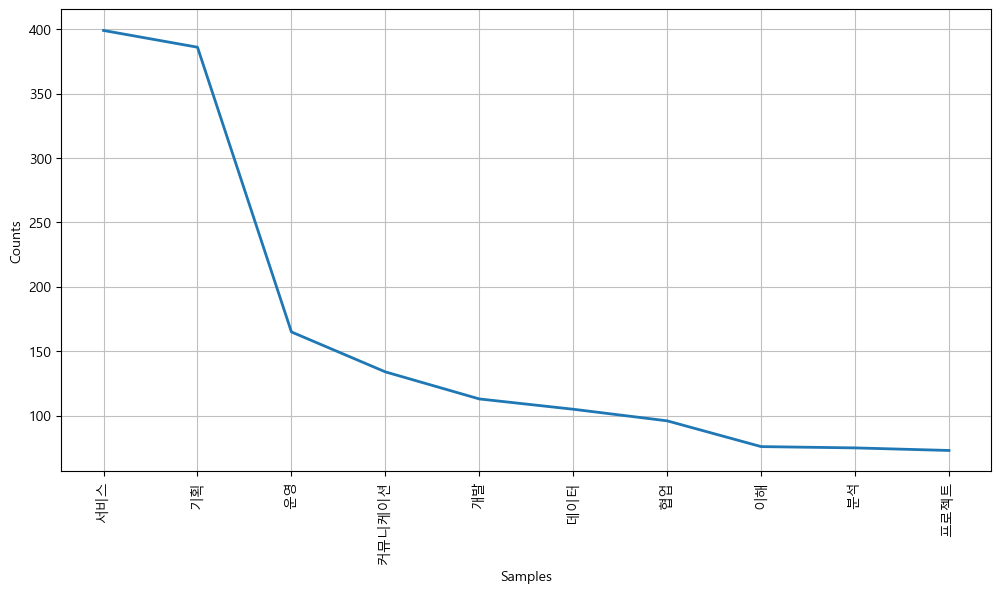

In [11]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

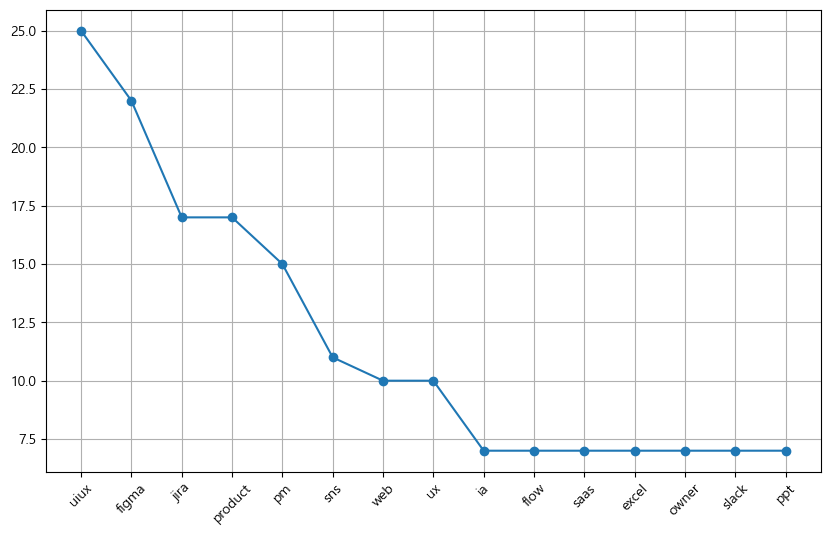

In [13]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['restful','office','back']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)